In [1]:
from keras.models import load_model
import cv2
import visvis as vv
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20,20]

import custom_layers

Using TensorFlow backend.


# Example usage of vrn-unguided-keras.h5
Download the h5py file here:
https://drive.google.com/file/d/1oh8Zpe4wh00iXcm8ztRsi5ZL6GMkHdjj/view?usp=sharing

In [2]:
custom_objects = {
    'Conv': custom_layers.Conv,
    'BatchNorm': custom_layers.BatchNorm,
    'UpSamplingBilinear': custom_layers.UpSamplingBilinear
}
model = load_model('vrn-unguided-keras.h5', custom_objects=custom_objects)

In [3]:
img = cv2.imread('joey.jpg')
img = cv2.resize(img, (192, 192))
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
img = np.swapaxes(img, 2, 0)
img = np.swapaxes(img, 2, 1)
img = np.array([img])

In [4]:
pred = model.predict(img)

In [5]:
vol = pred[0] * 255
im = img[0]
im = np.swapaxes(im, 0, 1)
im = np.swapaxes(im, 1, 2)

volRGB = np.stack(((vol > 1) * im[:,:,0],
                   (vol > 1) * im[:,:,1],
                   (vol > 1) * im[:,:,2]), axis=3)

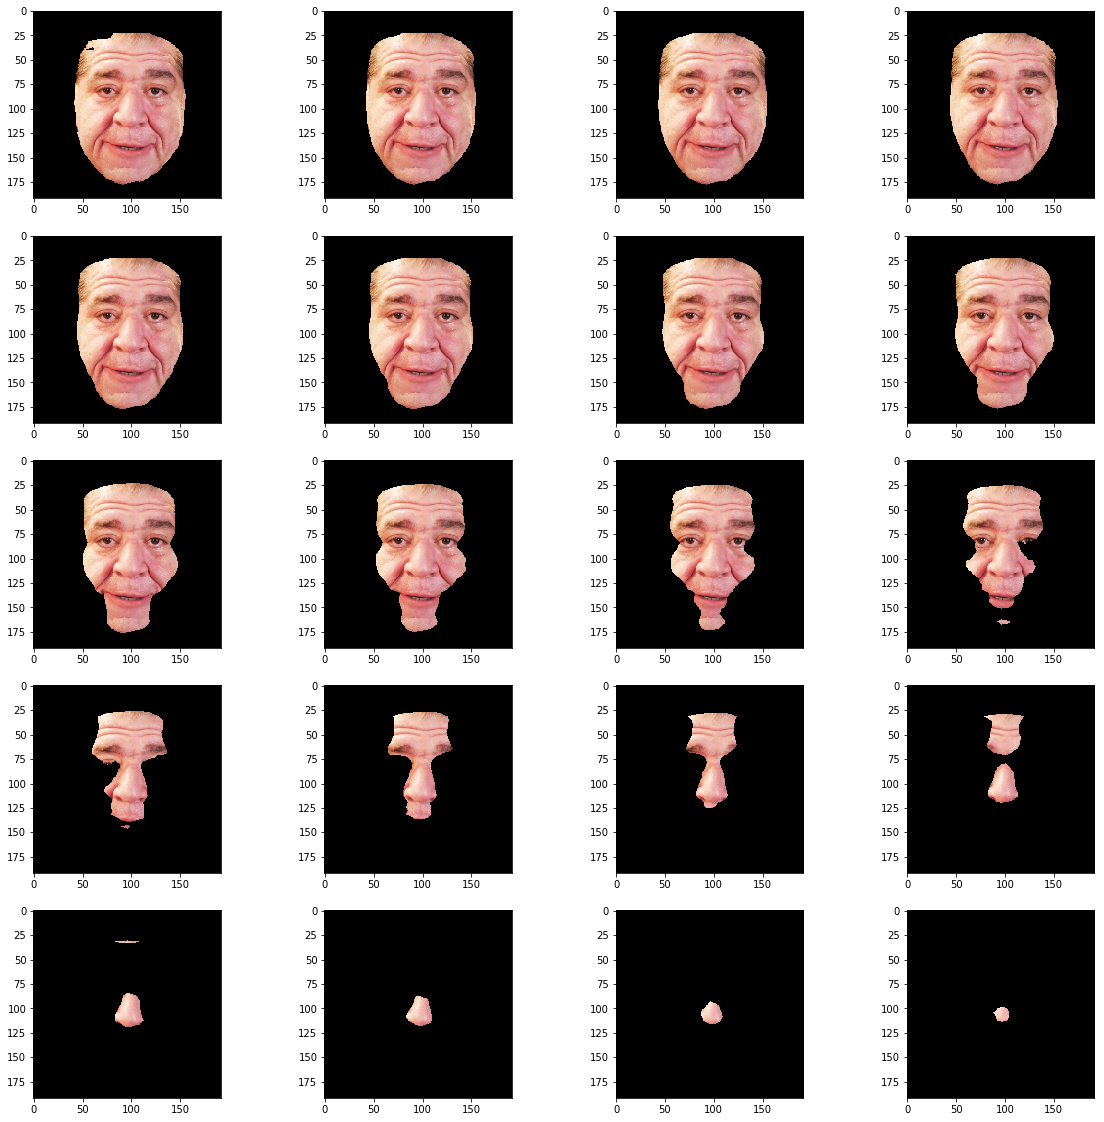

In [6]:
for i, p in enumerate(volRGB[80:180:5]):
    plt.subplot(5, 4, i + 1)
    plt.imshow(p)
    
plt.show()

In [7]:
vv.clf()

t = vv.imshow(im)
t.interpolate = True

v = vv.volshow(volRGB, renderStyle='iso')

l0 = vv.gca()
l0.light0.ambient = 0.9 # 0.2 is default for light 0
l0.light0.diffuse = 1.0 # 1.0 is default

a = vv.gca()
a.camera.fov = 0 # orthographic

vv.use().Run()

![visvis render](screen_shot.png)